# Assessment 1: I can train and deploy a neural network

At this point, you've worked through a full deep learning workflow. You've loaded a dataset, trained a model, and deployed your model into a simple application. Validate your learning by attempting to replicate that workflow with a new problem.

We've included a dataset which consists of two classes:  

1) Face: Contains images which include the face of a whale  
2) Not Face: Contains images which do not include the face of a whale.  

The dataset is located at ```/dli/data/whale/data/train```.

Your challenge is:

1) Use [DIGITS](/digits) to train a model to identify *new* whale faces with an accuracy of more than 80%.   

2) Deploy your model by modifying and saving the python application [submission.py](../../../../edit/tasks/task-assessment/task/submission.py) to return the word "whale" if the image contains a whale's face and "not whale" if the image does not.  

Resources:

1) [Train a model](../../task1/task/Train%20a%20Model.ipynb)  
2) [New Data as a goal](../../task2/task/New%20Data%20as%20a%20Goal.ipynb)  
3) [Deployment](../../task3/task/Deployment.ipynb)  

Suggestions: 

- Use empty code blocks to find out any informantion necessary to solve this problem: eg: ```!ls [directorypath] prints the files in a given directory``` 
- Executing the first two cells below will run your python script with test images, the first should return "whale" and the second should return "not whale" 

Start in [DIGITS](/digits/). 

In [56]:
!python submission.py $FACE 2>/dev/null  #This should return "whale" at the very bottom

In [57]:
!python submission.py $NOT_FACE 2>/dev/null #This should return "not whale" at the very bottom

In [1]:
import caffe
caffe.set_mode_gpu()
import matplotlib.pyplot as plt
%matplotlib.inline

ERROR:root:Line magic function `%matplotlib.inline` not found.


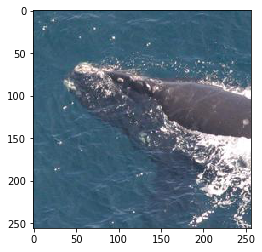

In [4]:
IMAGE_FILE = '/dli/data/whale/data/train/face/w_1.jpg'
input_image= caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)
plt.show()

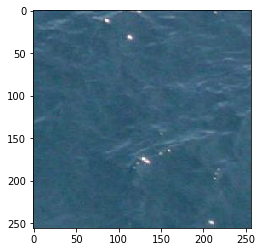

In [5]:
IMAGE_FILE = '/dli/data/whale/data/train/not_face/w_1.jpg'
input_image= caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)
plt.show()

# Deployment 

In [26]:
MODEL_JOB_DIR = '/dli/data/digits/20200810-123557-281c'  
!ls $MODEL_JOB_DIR

caffe_output.log		snapshot_iter_270.caffemodel
deploy.prototxt			snapshot_iter_324.caffemodel
original.prototxt		snapshot_iter_378.caffemodel
snapshot_iter_1026.caffemodel	snapshot_iter_432.caffemodel
snapshot_iter_108.caffemodel	snapshot_iter_486.caffemodel
snapshot_iter_1080.caffemodel	snapshot_iter_54.caffemodel
snapshot_iter_1134.caffemodel	snapshot_iter_540.caffemodel
snapshot_iter_1188.caffemodel	snapshot_iter_594.caffemodel
snapshot_iter_1242.caffemodel	snapshot_iter_648.caffemodel
snapshot_iter_1296.caffemodel	snapshot_iter_702.caffemodel
snapshot_iter_1350.caffemodel	snapshot_iter_756.caffemodel
snapshot_iter_1404.caffemodel	snapshot_iter_810.caffemodel
snapshot_iter_1458.caffemodel	snapshot_iter_864.caffemodel
snapshot_iter_1512.caffemodel	snapshot_iter_918.caffemodel
snapshot_iter_1566.caffemodel	snapshot_iter_972.caffemodel
snapshot_iter_162.caffemodel	solver.prototxt
snapshot_iter_1620.caffemodel	status.pickle
snapshot_iter_1620.solverstate	train_val.prototxt
snapshot_iter

In [27]:
ARCHITECTURE = MODEL_JOB_DIR + '/' + 'deploy.prototxt'
WEIGHTS = MODEL_JOB_DIR + '/' + 'snapshot_iter_756.caffemodel'
print ("Filepath to Architecture = " + ARCHITECTURE)
print("Filepath to weights = "+ WEIGHTS)

Filepath to Architecture = /dli/data/digits/20200810-123557-281c/deploy.prototxt
Filepath to weights = /dli/data/digits/20200810-123557-281c/snapshot_iter_756.caffemodel


In [28]:
import caffe
caffe.set_mode_gpu()

In [30]:
   net = caffe.Classifier('/dli/data/digits/20200810-123557-281c/deploy.prototxt', '/dli/data/digits/20200810-123557-281c/snapshot_iter_756.caffemodel',
                           channel_swap=(2,1,0),
                           raw_scale=255)

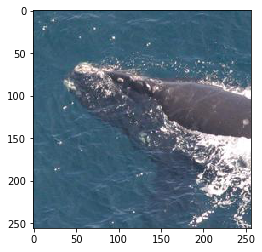

In [31]:
import matplotlib.pyplot as plt 
input_image= caffe.io.load_image('/dli/data/whale/data/train/face/w_1.jpg')
plt.imshow(input_image)
plt.show()

In [32]:
DATA_JOB_DIR = '/dli/data/digits/20200810-123337-e2b7'  ## Remember to set this to be the job directory for your model
!ls $DATA_JOB_DIR

create_train_db.log  labels.txt        mean.jpg       train.txt  val.txt
create_val_db.log    mean.binaryproto  status.pickle  train_db	 val_db


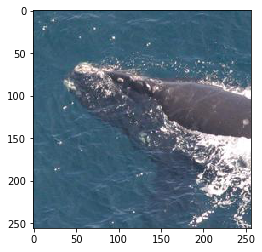

In [33]:
import cv2
input_image=cv2.resize(input_image, (256, 256), 0,0)
plt.imshow(input_image)
plt.show()

In [34]:
mean_image = caffe.io.load_image(DATA_JOB_DIR+'/mean.jpg')
ready_image = input_image-mean_image

In [35]:
# make prediction
prediction = net.predict([ready_image])
print prediction

[[  9.99949098e-01   5.09071615e-05]]


Input image:


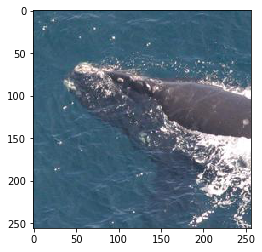

Output:
Sorry cat:( https://media.giphy.com/media/jb8aFEQk3tADS/giphy.gif


In [36]:
print("Input image:")
plt.imshow(input_image)
plt.show()

print("Output:")
if prediction.argmax()==0:
    print "Sorry cat:( https://media.giphy.com/media/jb8aFEQk3tADS/giphy.gif"
else:
    print "Welcome dog! https://www.flickr.com/photos/aidras/5379402670"

Input Image:


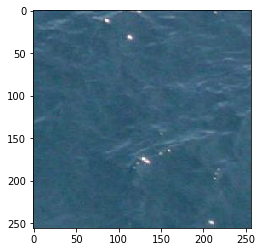

[[ 0.00235755  0.9976424 ]]
Output:
Welcome dog! https://www.flickr.com/photos/aidras/5379402670


In [37]:
##Create an input our network expects
input_image= caffe.io.load_image('/dli/data/whale/data/train/not_face/w_1.jpg')
input_image=cv2.resize(input_image, (256, 256), 0,0)
ready_image = input_image-mean_image
##Treat our network as a function that takes an input and generates an output
prediction = net.predict([ready_image])
print("Input Image:")
plt.imshow(input_image)
plt.show()
print(prediction)
##Create a useful output
print("Output:")
if prediction.argmax()==0:
    print "Sorry cat:( https://media.giphy.com/media/jb8aFEQk3tADS/giphy.gif"
else:
    print "Welcome dog! https://www.flickr.com/photos/aidras/5379402670"

In [40]:
!ls /dli/data/whale/data/train

face  not_face


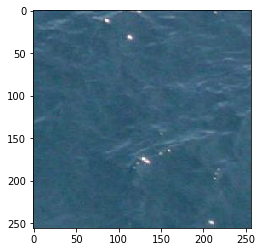

In [51]:
NOT_FACE = '/dli/data/whale/data/train/not_face/w_1.jpg'
display= caffe.io.load_image(NOT_FACE)
plt.imshow(display)
plt.show()

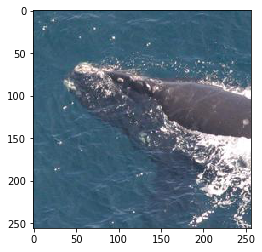

In [52]:
FACE = '/dli/data/whale/data/train/face/w_1.jpg'
display= caffe.io.load_image(FACE)
plt.imshow(display)
plt.show()

In [53]:
!python submission.py $FACE 2>/dev/null

In [54]:
!python submission.py $NOT_FACE 2>/dev/null

In [62]:
import caffe
import cv2
import sys

def deploy(img_path):

    caffe.set_mode_gpu()
    
    # Initialize the Caffe model using the model trained in DIGITS. Which two files constitute your trained model?
    net = caffe.Classifier('/dli/data/digits/20200810-123557-281c/deploy.prototxt', '/dli/data/digits/20200810-123557-281c/snapshot_iter_756.caffemodel',
                           channel_swap=(2,1,0),
                           raw_scale=255,
                           image_dims=(256, 256))
                       
    # Create an input that the network expects. This is different for each project, so don't worry about the exact steps, but find the dataset job directory to show you know that whatever preprocessing is done during training must also be done during deployment.
    input_image= caffe.io.load_image(img_path)
    input_image = cv2.resize(input_image, (256,256))
    mean_image = caffe.io.load_image('/dli/data/digits/20200810-123337-e2b7/mean.jpg')
    input_image = input_image-mean_image

    # Make prediction. What is the function and the input to the function needed to make a prediction?
    prediction = net.predict([input_image])
    # Create an output that is useful to a user. What is the condition that should return "whale" vs. "not whale"?
    if prediction.argmax()==0:
        return "whale"
    else:
        return "not whale"

